In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [30]:
full_data = np.load('machine_learning_data.npy')
np.random.shuffle(full_data)

In [31]:
X_data = pd.DataFrame(full_data[:,25:-5])
y_data = pd.DataFrame(full_data[:,-5:])


In [32]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [34]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [35]:
reg_rf.score(X_test,y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.18473726090898207

In [36]:
print (np.mean((y_rf - y_test)/(y_test)*100, axis=0))

0   -0.020921
1   -0.002866
2    0.232763
3    3.620113
4    0.004425
dtype: float64


In [37]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [38]:
pd.concat([y_test,y_rf] ,axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.995232,14.040590,0.905168,1.500635,0.809364,13.128833,14.034462,1.024861,1.396570,0.752808
1,13.076044,14.126768,0.921011,0.982768,1.037095,13.187207,14.042743,1.008421,0.810625,0.920457
2,13.036996,14.019766,0.894009,1.196346,0.811958,13.002280,14.044428,0.843690,1.405789,0.942235
3,13.195638,14.077318,0.749941,0.913377,1.070424,13.124919,14.005618,0.789996,1.251379,1.024816
4,13.124921,14.107890,1.168614,0.934253,0.895698,13.121144,14.097698,1.179392,0.952348,0.839625
...,...,...,...,...,...,...,...,...,...,...
495,13.059739,14.019181,1.159835,0.904668,0.819852,13.076885,14.079223,1.187471,0.830742,0.877865
496,13.118495,14.055307,1.038079,1.146959,1.020624,13.139623,14.014244,1.062528,0.885716,0.975809
497,13.198291,14.110871,0.804443,1.084542,1.021151,13.096601,14.126236,0.752939,1.373571,0.970687
498,13.029390,14.125515,0.854715,0.762353,1.059500,13.108711,14.006324,0.892215,1.033257,0.911097


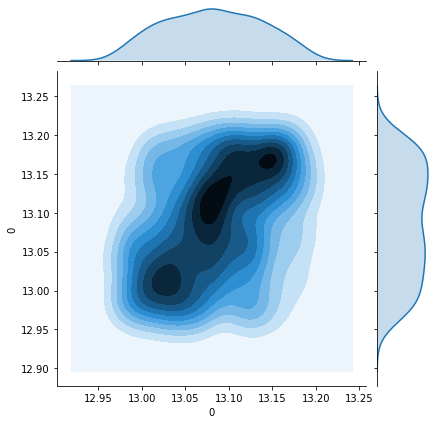

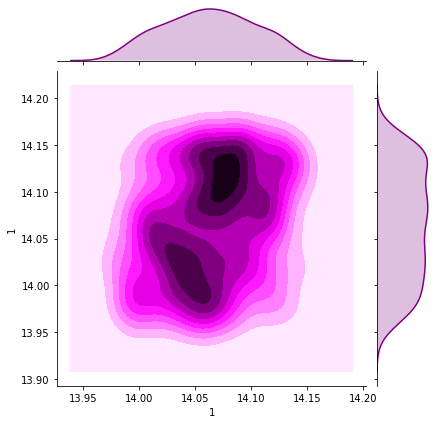

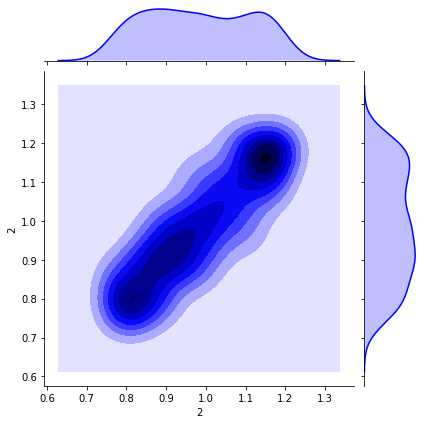

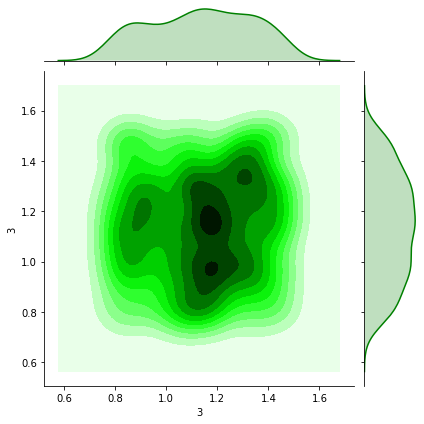

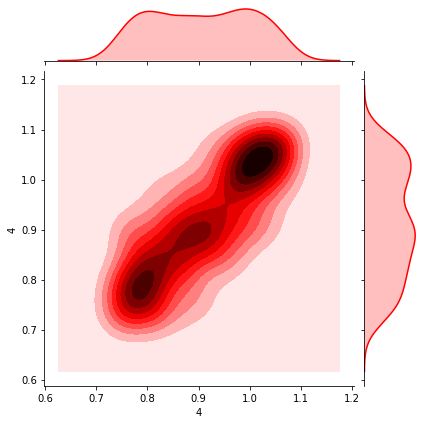

In [39]:
plot_corr(y_rf,y_test)

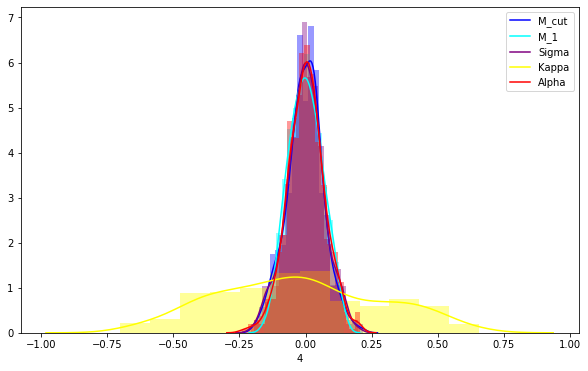

In [13]:
plot_error(y_rf,y_test,dims=(10,6))

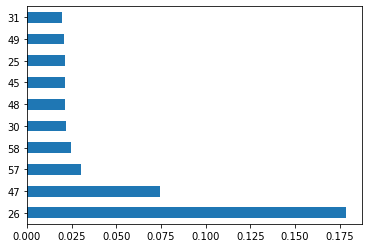

In [14]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [15]:
feat_importances.nlargest(4)

26    0.178462
47    0.074506
57    0.030102
58    0.024672
dtype: float64

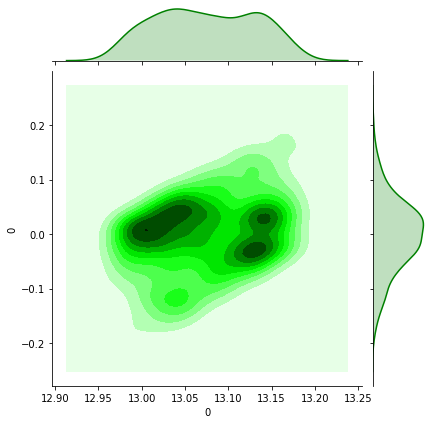

In [25]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

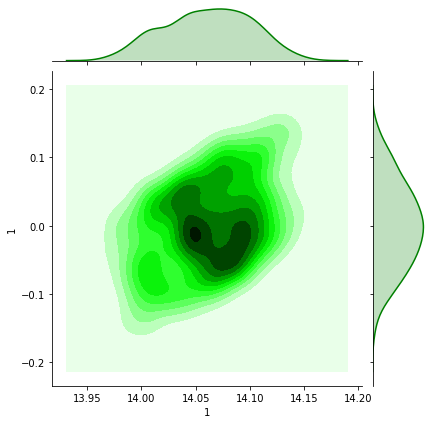

In [26]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

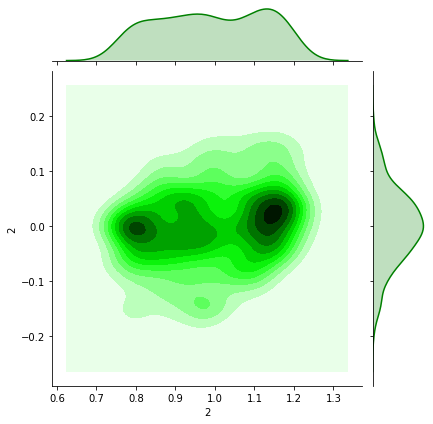

In [27]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

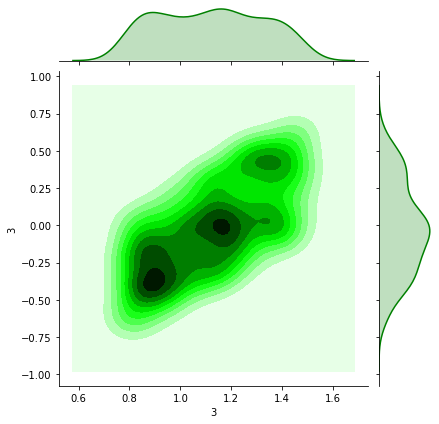

In [28]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

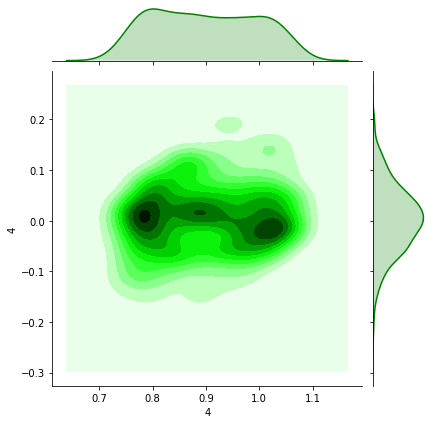

In [29]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [40]:
%%time
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=10000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1,verbosity=1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


In [41]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0   -0.035426
1   -0.034143
2   -0.050545
3    2.017277
4   -0.255631
dtype: float64


0.5058173944832591

In [42]:
y_multirf = pd.DataFrame(y_multirf)
y_multirf.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Root Mean Squared error

print("y1 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_multirf.iloc[:,0]))) 
print("y2 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_multirf.iloc[:,1])))
print("y3 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,2], y_multirf.iloc[:,2]))) 
print("y4 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,3], y_multirf.iloc[:,3])))
print("y5 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,4], y_multirf.iloc[:,4]))) 

y1 MSE:0.0515
y2 MSE:0.0450
y3 MSE:0.0405
y4 MSE:0.2186
y5 MSE:0.0384


In [ ]:
pd.concat([y_test,y_multirf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.995232,14.040590,0.905168,1.500635,0.809364,13.022405,14.039573,0.936342,1.158529,0.825884
1,13.076044,14.126768,0.921011,0.982768,1.037095,13.107837,14.061581,1.000118,1.147781,0.982685
2,13.036996,14.019766,0.894009,1.196346,0.811958,13.075716,14.034486,0.902224,1.141549,0.882191
3,13.195638,14.077318,0.749941,0.913377,1.070424,13.160613,14.011249,0.746746,1.117443,1.023473
4,13.124921,14.107890,1.168614,0.934253,0.895698,13.114133,14.069351,1.173379,1.182915,0.906227
...,...,...,...,...,...,...,...,...,...,...
495,13.059739,14.019181,1.159835,0.904668,0.819852,13.043151,14.071566,1.135420,1.095697,0.846891
496,13.118495,14.055307,1.038079,1.146959,1.020624,13.072312,14.056169,0.999871,1.007938,1.020461
497,13.198291,14.110871,0.804443,1.084542,1.021151,13.139352,14.074336,0.789861,0.974261,0.984993
498,13.029390,14.125515,0.854715,0.762353,1.059500,13.060800,14.058956,0.879004,1.204659,1.040686


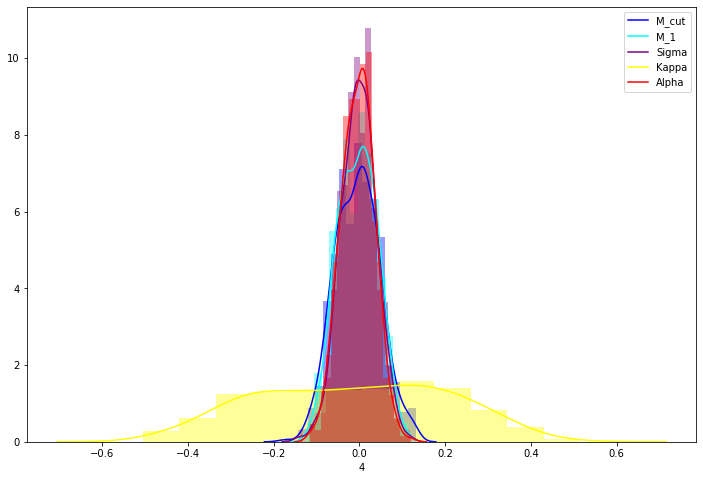

In [ ]:
plot_error(y_multirf,y_test)

In [ ]:
plot_corr(y_multirf,y_test)

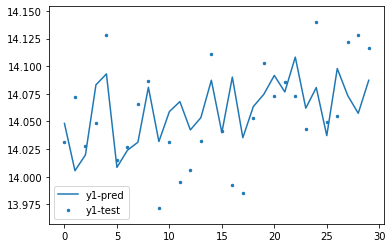

In [24]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:30], y_test.iloc[:30,1],  s=6, label="y1-test")
plt.plot(x_ax[:30], y_multirf.iloc[:30,1], label="y1-pred")
#plt.scatter(x_ax[:20], y_test.iloc[:20,4],  s=6, label="y2-test")
#plt.plot(x_ax[:20], y_multirf.iloc[:20,4], label="y2-pred")
plt.legend()
plt.show()

In [29]:
'''
#from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,2000,50)],
    "max_depth":[None,200,250,300],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)
clf.fit(X_train,y_train)
'''

'\n#from sklearn.model_selection import GridSearchCV\nparameters = {"n_estimators":[i for i in range(50,2000,50)],\n    "max_depth":[None,200,250,300],\n    "min_samples_split":[2],\n    "max_features":(\'auto\',\'sqrt\',\'log2\'),\n    "bootstrap":[True,False],\n    "oob_score":[True,False]}\n\nclf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)\nclf.fit(X_train,y_train)\n'

In [30]:
#sorted(clf.cv_results_.keys())

In [31]:
#grid = clf.predict(X_test)
#print (np.mean((grid - y_test)**2/(grid**2), axis=0))